In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
%matplotlib inline

In [30]:
def g2_SA(t, t0, gamma, omega, cnt, pulse_len):
    omega_gamma = np.sqrt(((omega*(2*np.pi))**2) - ((0.25*gamma*(2*np.pi))**2))
    
    return cnt*(1- np.abs((t-t0)/pulse_len))*(1 - (np.exp(-np.abs((3*gamma*(2*np.pi)/4)*(t-t0))))*(np.cos((omega_gamma*np.abs(t-t0)))+((3*gamma*(2*np.pi)/(4*omega_gamma))*np.sin((omega_gamma*np.abs(t-t0))))))

def fit_g2(t_in,coincidence,coincidence_err):
    mod = Model(g2_SA)
    
    #set parameter and make init guess
    p = Parameters()
    p.add('t0', 480e-9,vary=0)
    p.add('gamma', 6.07e6)
    p.add('omega', 30e6)
    p.add('cnt', 200)
    p.add('pulse_len', 2e-6, vary = 0)
    
    return mod.fit(coincidence,t=t_in,params=p, weights = 1/(coincidence_err))

In [3]:
def g2_SA_weak(t, t0, gamma, omega, cnt, pulse_len):
    omega_inv = np.sqrt(-((omega*(2*np.pi))**2) + ((0.25*gamma*(2*np.pi))**2))
    
    return cnt*(1- np.abs((t-t0)/pulse_len))*(1 - (np.exp(-np.abs((3*gamma*(2*np.pi)/4)*(t-t0))))*(np.cosh((omega_inv*np.abs(t-t0)))+((3*gamma*(2*np.pi)/(4*omega_inv))*np.sinh((omega_inv*np.abs(t-t0))))))
    #return cnt*(1- np.abs((t-t0)/pulse_len))*((1 - np.exp(-0.5*gamma*(np.abs(t-t0))))**2)

def fit_g2_weak(t_in,coincidence,coincidence_err):
    mod = Model(g2_SA_weak)
    
    #set parameter and make init guess
    p = Parameters()
    p.add('t0', 480e-9)
    p.add('gamma', 6.07e6, vary = 0)
    p.add('omega', 1.2e6, min = 1e4, max = 1.2e6)
    p.add('cnt', 120)
    p.add('pulse_len', 10e-6, vary = 0)
    
    return mod.fit(coincidence,t=t_in,params=p, weights = 1/(coincidence_err))

In [31]:
filename = '265'
data = np.genfromtxt('data_g2/'+filename+'amp.dat')
t_data = data[:,0]*1e-9
coin = data[:,3]+1
coin_err = np.sqrt(data[:,3]+1)

fit_result = fit_g2(t_data,coin,coin_err)

[[Model]]
    Model(g2_SA)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 165
    # variables        = 3
    chi-square         = 229.143168
    reduced chi-square = 1.41446400
    Akaike info crit   = 60.1862513
    Bayesian info crit = 69.5040877
[[Variables]]
    t0:         4.8e-07 (fixed)
    gamma:      7477450.49 +/- 450519.230 (6.03%) (init = 6070000)
    omega:      27906270.4 +/- 315217.885 (1.13%) (init = 3e+07)
    cnt:        242.602230 +/- 1.51435833 (0.62%) (init = 200)
    pulse_len:  2e-06 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(gamma, omega) = 0.222


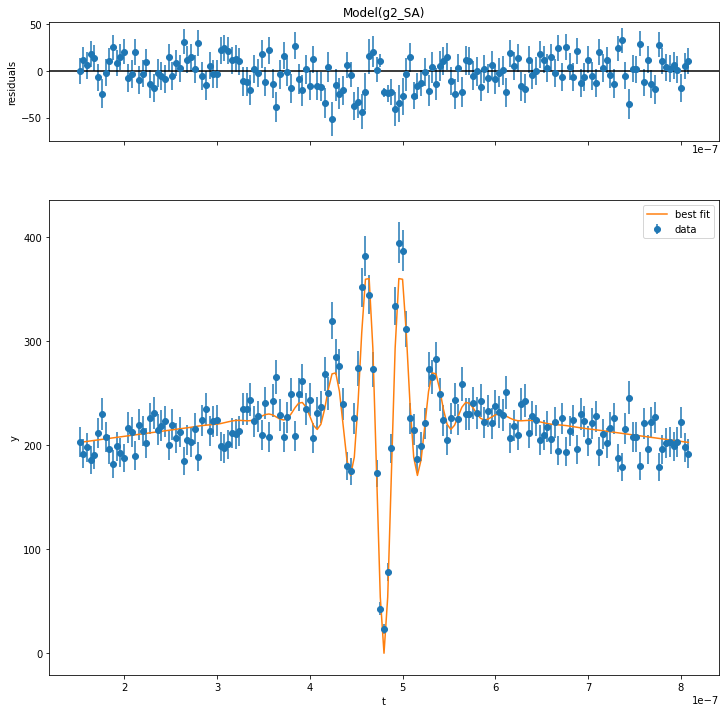

In [32]:
print(fit_result.fit_report())
plt.rcParams["figure.figsize"] = (12,10)
fit_result.plot()
plt.show()

In [5]:
filename = '75'
data = np.genfromtxt('data_g2/'+filename+'amp.dat')
t_data = data[:,0]*1e-9
coin = data[:,3]+1
coin_err = np.sqrt(data[:,3]+1)

fit_result = fit_g2_weak(t_data,coin,coin_err)

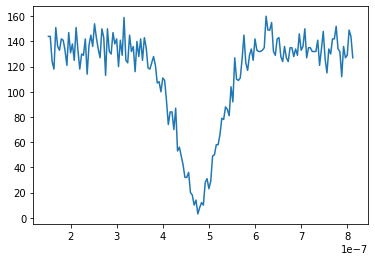

In [6]:
#test = g2_SA_weak(t_data, 480e-9, 8.07e6, .1e6, 165, 1.5e-6)
plt.plot(t_data, coin)
#plt.plot(t_data, test+5)

[[Model]]
    Model(g2_SA_weak)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 166
    # variables        = 3
    chi-square         = 296.418493
    reduced chi-square = 1.81851836
    Akaike info crit   = 102.244226
    Bayesian info crit = 111.580190
[[Variables]]
    t0:         4.7662e-07 +/- 1.0943e-09 (0.23%) (init = 4.8e-07)
    gamma:      6070000 (fixed)
    omega:      1199993.33 +/- 3557670.11 (296.47%) (init = 1200000)
    cnt:        147.083468 +/- 2.10218354 (1.43%) (init = 120)
    pulse_len:  1e-05 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(omega, cnt) = 0.723


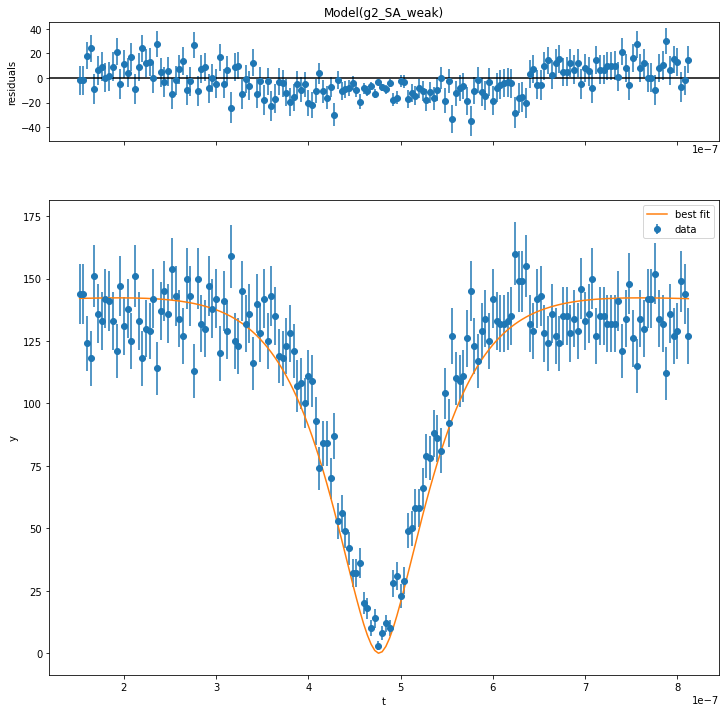

In [13]:
print(fit_result.fit_report())
plt.rcParams["figure.figsize"] = (12,10)
fit_result.plot()
plt.show()

# export simulation result

In [22]:
t_list = np.arange(150,810,0.5)*1e-9

result_t0 = fit_result.params['t0'].value
result_gamma = fit_result.params['gamma'].value
result_omega = fit_result.params['omega'].value
result_cnt = fit_result.params['cnt'].value
result_pulse_len = fit_result.params['pulse_len'].value

sim_result = g2_SA(t_list, result_t0, result_gamma, result_omega, result_cnt, result_pulse_len)

In [23]:
out_text = np.c_[(t_list*1e9, sim_result)]
file_name = 'sim_g2/' + filename + 'amp.dat'
np.savetxt(file_name, out_text, delimiter='\t', fmt='%f', header="time\tg2")

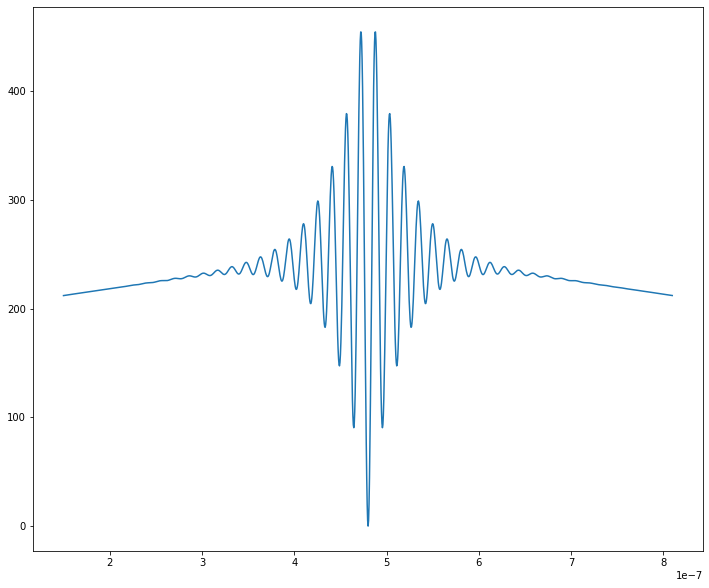

In [24]:
plt.plot(t_list, sim_result)